<a href="https://colab.research.google.com/github/Madhyama-Singh/mlr-feature-selection-bike-usage/blob/main/Statistical_inference_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
data = pd.read_csv('/content/day[1].csv')

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
data.shape

(730, 16)

In [ ]:
# Select independent(X) and dependent(Y) variables
X = data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = data['cnt']

In [ ]:
X.shape

(730, 11)

In [ ]:
# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['season', 'weathersit'], drop_first=True, dtype=float) # Ensure dtype is float

In [ ]:
X.shape

(730, 14)

In [ ]:
X.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,0.0,0.0,0.0,1.0,0.0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,0.0,0.0,0.0,1.0,0.0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,0.0,0.0,0.0,0.0,0.0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,0.0,0.0,0.0,0.0,0.0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,0.252055,0.257534,0.243836,0.336986,0.028767
std,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,0.434490,0.437576,0.429689,0.473004,0.167266
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,1.000000,1.000000,1.000000,1.000000,1.000000


# FORWARD SELECTION

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Function to calculate AIC for a given model
def calculate_aic(X, y):
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    return model.aic, model

# Forward selection
def forward_selection(X, y, verbose=True):
    remaining_features = list(X.columns)
    selected_features = []
    current_score, best_new_score = np.inf, np.inf
    best_model = None

    while remaining_features:
        scores_with_candidates = []

        for candidate in remaining_features:
            features_to_test = selected_features + [candidate]
            aic, model = calculate_aic(X[features_to_test], y)
            scores_with_candidates.append((aic, candidate, model))

        # Choose the candidate with the lowest AIC
        scores_with_candidates.sort()
        best_new_score, best_candidate, candidate_model = scores_with_candidates[0]

        if best_new_score < current_score:
            remaining_features.remove(best_candidate)
            selected_features.append(best_candidate)
            current_score = best_new_score
            best_model = candidate_model

            if verbose:
                print(f"Adding: {best_candidate}, AIC: {current_score:.2f}")
        else:
            break

    return best_model, selected_features

# Run forward selection
final_model, selected = forward_selection(X, y)

# Summary of final model
print("\nSelected features:", selected)
print(final_model.summary())


Adding: atemp, AIC: 12754.30
Adding: yr, AIC: 12271.62
Adding: season_4, AIC: 12179.98
Adding: weathersit_3, AIC: 12091.06
Adding: weathersit_2, AIC: 12031.54
Adding: season_2, AIC: 11985.01
Adding: season_3, AIC: 11941.21
Adding: weekday, AIC: 11917.40
Adding: windspeed, AIC: 11895.75
Adding: hum, AIC: 11880.29
Adding: holiday, AIC: 11871.28
Adding: temp, AIC: 11864.92
Adding: workingday, AIC: 11863.62

Selected features: ['atemp', 'yr', 'season_4', 'weathersit_3', 'weathersit_2', 'season_2', 'season_3', 'weekday', 'windspeed', 'hum', 'holiday', 'temp', 'workingday']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     265.1
Date:                Thu, 10 Apr 2025   Prob (F-statistic):          3.19e-263
Time:                        1

# BACKWARD ELIMINATION

In [ ]:
# Function to compute AIC for a given model
def calculate_aic(X, y):
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    return model.aic, model

# Backward elimination
def backward_elimination(X, y, verbose=True):
    selected_features = list(X.columns)
    current_score, best_new_score = calculate_aic(X[selected_features], y)
    best_model = None

    while selected_features:
        scores_with_candidates = []

        for candidate in selected_features:
            features_to_test = [f for f in selected_features if f != candidate]
            aic, model = calculate_aic(X[features_to_test], y)
            scores_with_candidates.append((aic, candidate, model))

        # Sort by AIC
        scores_with_candidates.sort()
        best_new_score, worst_candidate, candidate_model = scores_with_candidates[0]

        if best_new_score < current_score:
            selected_features.remove(worst_candidate)
            current_score = best_new_score
            best_model = candidate_model

            if verbose:
                print(f"Dropped: {worst_candidate}, AIC: {current_score:.2f}")
        else:
            break

    return best_model, selected_features

# Run backward elimination
final_model_bwd, selected_bwd = backward_elimination(X, y)

# Summary
print("\nSelected features:", selected_bwd)
print(final_model_bwd.summary())


Dropped: atemp, AIC: 11863.40
Dropped: mnth, AIC: 11862.44

Selected features: ['yr', 'holiday', 'weekday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     287.2
Date:                Thu, 10 Apr 2025   Prob (F-statistic):          2.75e-264
Time:                        12:49:30   Log-Likelihood:                -5918.2
No. Observations:                 730   AIC:                         1.186e+04
Df Residuals:                     717   BIC:                         1.192e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                  

#STEPWISE SELECTION

In [ ]:
def calculate_aic(X, y):
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    return model.aic, model

def stepwise_aic(X, y, verbose=True):
    included = []
    best_aic, best_model = calculate_aic(pd.DataFrame(index=X.index), y)
    if verbose:
        print(f"Start: AIC={best_aic:.3f} with intercept only")

    while True:
        changed = False
        candidates = []

        # Forward Step
        excluded = list(set(X.columns) - set(included))
        for feature in excluded:
            trial_features = included + [feature]
            aic, _ = calculate_aic(X[trial_features], y)
            candidates.append((aic, feature, 'add'))

        # Backward Step
        if included:
            for feature in included:
                trial_features = [f for f in included if f != feature]
                if trial_features:
                    aic, _ = calculate_aic(X[trial_features], y)
                    candidates.append((aic, feature, 'remove'))

        # Select best option
        if not candidates:
            break

        candidates.sort()
        best_candidate = candidates[0]
        new_aic, feature, action = best_candidate

        if new_aic < best_aic:
            changed = True
            best_aic = new_aic
            if action == 'add':
                included.append(feature)
                if verbose:
                    print(f"Step: AIC={new_aic:.3f} | Added   {feature}")
            elif action == 'remove':
                included.remove(feature)
                if verbose:
                    print(f"Step: AIC={new_aic:.3f} | Removed {feature}")
            _, best_model = calculate_aic(X[included], y)
        else:
            break

    return best_model, included

model, selected_features = stepwise_aic(X, y)

print("\nFinal selected features based on AIC:")
print(selected_features)

print(model.summary())


Start: AIC=13122.492 with intercept only
Step: AIC=12754.305 | Added   atemp
Step: AIC=12271.618 | Added   yr
Step: AIC=12179.981 | Added   season_4
Step: AIC=12091.056 | Added   weathersit_3
Step: AIC=12031.544 | Added   weathersit_2
Step: AIC=11985.007 | Added   season_2
Step: AIC=11941.211 | Added   season_3
Step: AIC=11917.396 | Added   weekday
Step: AIC=11895.753 | Added   windspeed
Step: AIC=11880.295 | Added   hum
Step: AIC=11871.281 | Added   holiday
Step: AIC=11864.916 | Added   temp
Step: AIC=11863.624 | Added   workingday
Step: AIC=11862.438 | Removed atemp

Final selected features based on AIC:
['yr', 'season_4', 'weathersit_3', 'weathersit_2', 'season_2', 'season_3', 'weekday', 'windspeed', 'hum', 'holiday', 'temp', 'workingday']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:   

In [ ]:
comparison_data = {
    "Model": ["Forward", "Backward", "Stepwise"],
    "AIC": [final_model.aic, final_model_bwd.aic, model.aic],
    "BIC": [final_model.bic, final_model_bwd.bic, model.bic],
    "R-squared": [final_model.rsquared, final_model_bwd.rsquared, model.rsquared],
    "Adj. R-squared": [final_model.rsquared_adj, final_model_bwd.rsquared_adj, model.rsquared_adj],
    "No. of Predictors": [len(selected), len(selected_bwd), len(selected_features)],
}

comparison_df = pd.DataFrame(comparison_data)
print("\n Model Comparison Table (sorted by AIC):")
print(comparison_df.sort_values(by="AIC"))



 Model Comparison Table (sorted by AIC):
      Model           AIC           BIC  R-squared  Adj. R-squared  \
1  Backward  11862.438431  11922.148010   0.827779        0.824897   
2  Stepwise  11862.438431  11922.148010   0.827779        0.824897   
0   Forward  11863.624098  11927.926721   0.827971        0.824848   

   No. of Predictors  
1                 12  
2                 12  
0                 13  


# VISUALIZATION

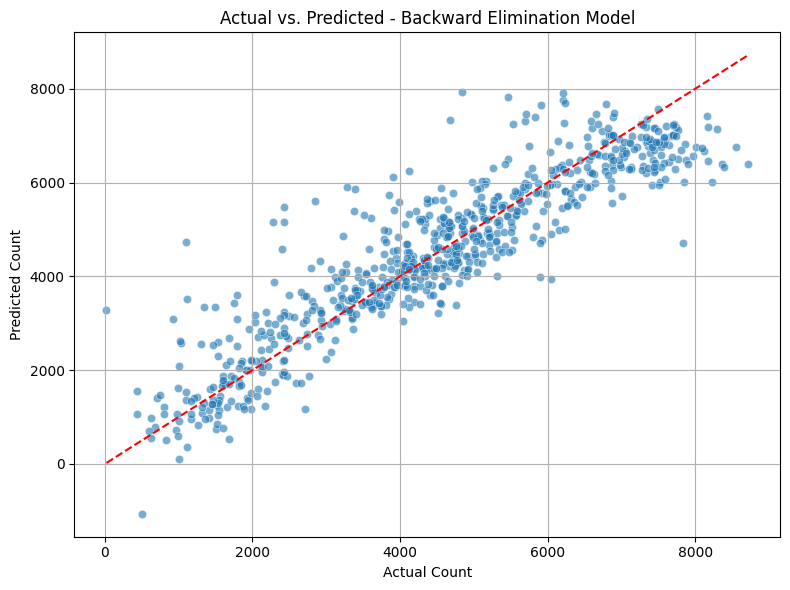

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict using the final backward model
y_pred = final_model_bwd.predict(sm.add_constant(X[selected_bwd]))

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Actual vs. Predicted - Backward Elimination Model")
plt.grid(True)
plt.tight_layout()
plt.show()

